# 回归树
DecisionTreeRegressor  
- 重要参数：criterion
回归树衡量分枝质量的指标，支持的标准有三种：  
1）输入"mse"使用均方误差mean squared error(MSE)，父节点和叶子节点之间的均方误差的差额将被用来作为
特征选择的标准，这种方法通过使用叶子节点的均值来最小化L2损失；  
2）输入“friedman_mse”使用费尔德曼均方误差，这种指标使用弗里德曼针对潜在分枝中的问题改进后的均方误差；  
3）输入"mae"使用绝对平均误差MAE（mean absolute error），这种指标使用叶节点的中值来最小化L1损失。  

属性中最重要的依然是feature_importances_，接口依然是apply, fit, predict, score最核心。

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score

## 数据预处理

In [2]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
boston.data.shape

(506, 13)

In [4]:
boston.target.shape

(506,)

In [6]:
regressor = DecisionTreeRegressor(random_state=0)  # 模型实例化
cross_val_score(regressor, boston.data, boston.target, cv=10
                ,scoring="neg_mean_squared_error"  # 用负的均方误差作为衡量指标
               )

array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

## 实例1：用回归树绘制正弦曲线

In [7]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

## 生成数据

In [8]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80,1), axis=0)
y = np.sin(X).ravel()  # ravel降到1维
y[::4] += 3 * (0.5 - rng.rand(20))  # 添加噪声

In [9]:
# np.random.rand(数组结构)，生成随机数组的函数
# 了解降维函数ravel()的用法
np.random.random((2,3))
np.random.random((2,3)).ravel()
np.random.random((2,3)).ravel().shape

(6,)

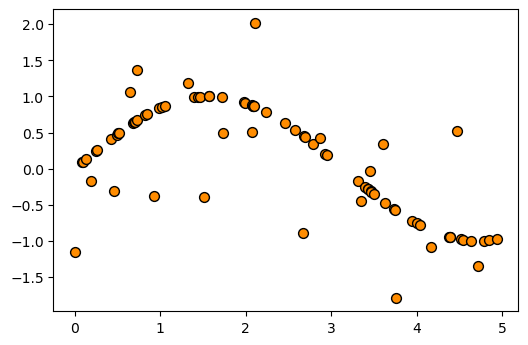

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4), dpi=100)
plt.scatter(X, y, s=50, edgecolor="black", c="darkorange", label="sin_data")

## 训练模型

In [11]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [12]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]  # np.newaxis升维

In [13]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

## 绘制图像

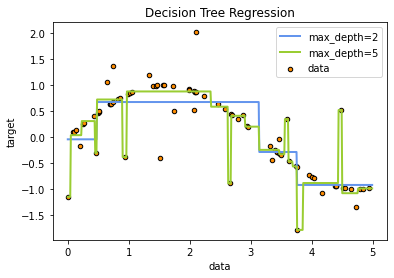

In [14]:
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()